In [57]:
import pandas as pd
import numpy as np
import glob

In [58]:
# Merge data into a single file
directory = 'Sales_Data/*'
dfs = [pd.read_csv(filename) for filename in glob.glob(directory)]
df = pd.concat(dfs)
df.to_csv('sales_data.csv', index=False)

In [59]:
# Read new single file
df = pd.read_csv('sales_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [60]:
# Drop N/A rows
df.dropna(inplace=True)

In [61]:
# Remove column names as rows
df = df[df['Order ID'] != 'Order ID']

In [62]:
# Separate last column into columns: 'Address', 'State', 'City'
addresses = np.array([address.split(', ') for address in df['Purchase Address'].values])
df['Street'], df['City'], df['State'] = addresses[:, 0], addresses[:, 1], [x[:2] for x in addresses[:, 2]]
df.drop(['Purchase Address', 'Street'], axis='columns', inplace=True)

In [63]:
# Add total price column
df['Order Price'] = pd.to_numeric(df['Quantity Ordered']) * pd.to_numeric(df['Price Each'])

In [64]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,City,State,Order Price
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,Dallas,TX,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,Boston,MA,99.99
3,176560,Google Phone,1,600,04/12/19 14:38,Los Angeles,CA,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,Los Angeles,CA,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,Los Angeles,CA,11.99


In [65]:
# Add column data types int and float
dtypes = ['object', 'object', 'int', 'float', 'object', 'category', 'category', 'float']
col_types = dict(zip(df.columns, dtypes))
df = df.astype(col_types)

# Add column type datetime and set as index
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 185950 entries, 2019-04-19 08:46:00 to 2019-09-30 00:18:00
Data columns (total 7 columns):
Order ID            185950 non-null object
Product             185950 non-null object
Quantity Ordered    185950 non-null int64
Price Each          185950 non-null float64
City                185950 non-null category
State               185950 non-null category
Order Price         185950 non-null float64
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 8.9+ MB


In [67]:
# Sales per month
sales_per_month = df['Order Price'].resample('M').sum()

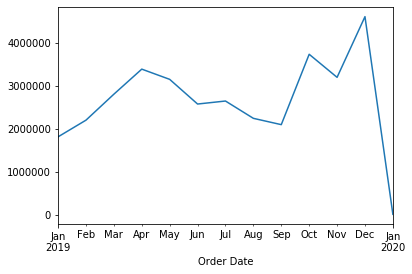

In [68]:
sales_per_month.plot(kind='line')